<a href="https://colab.research.google.com/github/akshithaa1/Titanic_survival_prediction_ML/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Load The Dataset**

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 40.9MB/s]


In [11]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [12]:
# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

In [13]:
display(train_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
display(test_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [15]:
# Save PassengerId for the final submission
test_passenger_ids = test_data['PassengerId']

In [16]:
# Combine train and test datasets for consistent preprocessing
combined_data = pd.concat([train_data.drop('Survived', axis=1), test_data], axis=0)

In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [18]:
combined_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [19]:
display(gender_submission)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# **Preprocessing data**

# Handling Missing values

In [20]:
train_data['Survived'].isnull().sum()

0

In [21]:
# Check for missing values in the combined dataset
missing_values = combined_data.isnull().sum()
# Display features with missing values
for feature, count in missing_values.items():
    if count > 0:
        print(f"Feature '{feature}' has {count} missing values.")

Feature 'Age' has 263 missing values.
Feature 'Fare' has 1 missing values.
Feature 'Cabin' has 1014 missing values.
Feature 'Embarked' has 2 missing values.


In [22]:
# Fill missing values
combined_data['Age'].fillna(combined_data['Age'].median(), inplace=True)
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].median(), inplace=True)
# Handle 'Cabin' by creating a new feature and dropping it
combined_data['HasCabin'] = combined_data['Cabin'].notnull().astype(int)
combined_data.drop('Cabin', axis=1, inplace=True)

In [23]:
print("Remaining missing values:")
print(combined_data.isnull().sum())

Remaining missing values:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


In [24]:
display(combined_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,0


In [25]:
combined_data.dtypes

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object


In [26]:
#to display the duplicates
combined_data.duplicated().sum()

0

<Axes: >

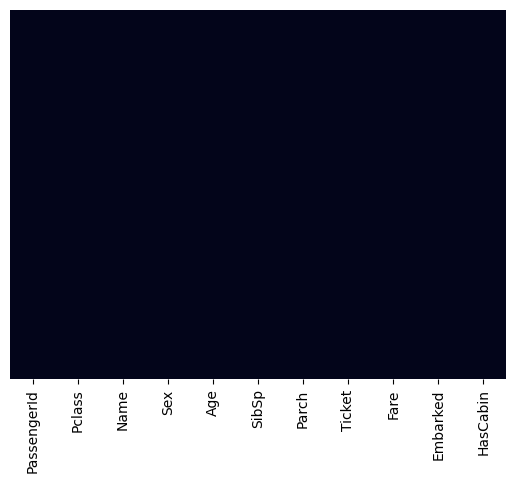

In [27]:
sns.heatmap(combined_data.isnull(),yticklabels=False,cbar=False)

<Axes: >

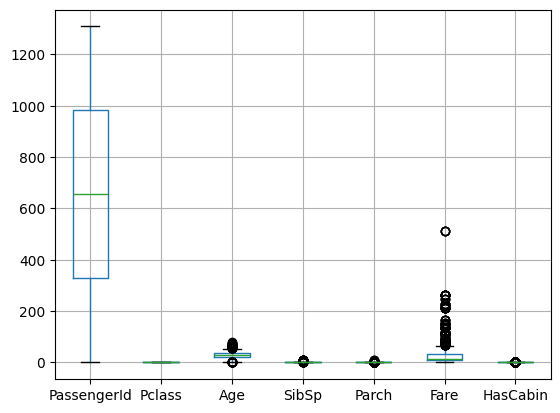

In [28]:
#handling outliers/extreme values in data
combined_data.boxplot()

<Axes: >

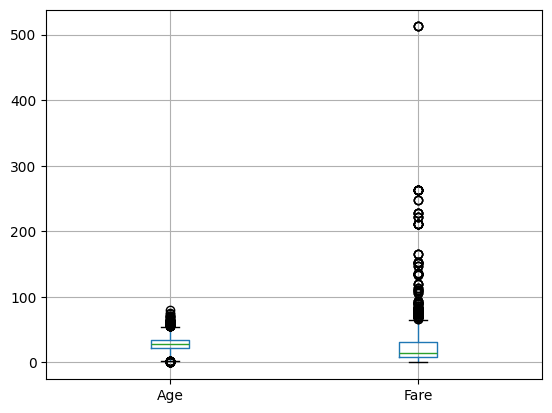

In [29]:
combined_data[['Age','Fare']].boxplot()

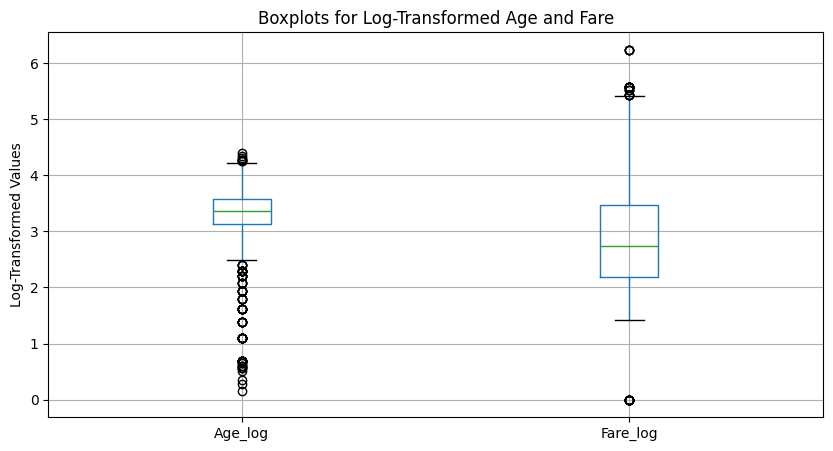

In [30]:
import numpy as np

# Apply log transformation to 'Age' and 'Fare'
combined_data['Age_log'] = np.log1p(combined_data['Age'])  # log1p handles zero values safely
combined_data['Fare_log'] = np.log1p(combined_data['Fare'])

# Visualize the transformed data (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
combined_data[['Age_log', 'Fare_log']].boxplot()
plt.title('Boxplots for Log-Transformed Age and Fare')
plt.ylabel('Log-Transformed Values')
plt.show()

In [31]:
# Separate features into categorical and numerical
categorical_features = combined_data.select_dtypes(include=['object']).columns
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Features:\n", categorical_features)
print("\nNumerical Features:\n", numerical_features)


Categorical Features:
 Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

Numerical Features:
 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin',
       'Age_log', 'Fare_log'],
      dtype='object')


# **Feature Engineering**

In [32]:
combined_data['FamilySize'] = combined_data['SibSp'] + combined_data['Parch'] + 1#larger families may have lower chances of survival('+1' indicates the passenger himself)

In [33]:
display(combined_data)#combined_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Age_log,Fare_log,FamilySize
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,3.135494,2.110213,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3.663562,4.280593,2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,3.295837,2.188856,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.583519,3.990834,2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,3.583519,2.202765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,0,3.367296,2.202765,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,3.688879,4.699571,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,3.676301,2.110213,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,0,3.367296,2.202765,1


In [34]:
combined_data['IsAlone'] = (combined_data['FamilySize'] == 1).astype(int)

In [35]:
combined_data['Title'] =combined_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [36]:
combined_data['FarePerPerson'] = combined_data['Fare'] / combined_data['FamilySize']

In [37]:
print(combined_data['Age'].min())
combined_data['Age'].max()

0.17


80.0

In [38]:
combined_data['AgeGroup'] = pd.cut(combined_data['Age'], bins=[0, 12, 18, 50, 80], labels=['Child', 'Teen', 'Adult', 'Senior'])

In [39]:
display(combined_data['Age'])

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
413,28.0
414,39.0
415,38.5
416,28.0


In [40]:
display(combined_data['AgeGroup'])

,AgeGroup
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
413,Adult
414,Adult
415,Adult
416,Adult


In [41]:
combined_data['TicketPrefix'] = combined_data['Ticket'].str.extract('([A-Za-z]+)', expand=False).fillna('None')

In [42]:
display(combined_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Age_log,Fare_log,FamilySize,IsAlone,Title,FarePerPerson,AgeGroup,TicketPrefix
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,3.135494,2.110213,2,0,Mr,3.625000,Adult,A
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3.663562,4.280593,2,0,Mrs,35.641650,Adult,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,3.295837,2.188856,1,1,Miss,7.925000,Adult,STON
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.583519,3.990834,2,0,Mrs,26.550000,Adult,None
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,3.583519,2.202765,1,1,Mr,8.050000,Adult,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,0,3.367296,2.202765,1,1,Mr,8.050000,Adult,A
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,3.688879,4.699571,1,1,Dona,108.900000,Adult,PC
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,3.676301,2.110213,1,1,Mr,7.250000,Adult,SOTON
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,0,3.367296,2.202765,1,1,Mr,8.050000,Adult,None


In [43]:
from google.colab import files

# Download the CSV file in Google Colab
combined_data.to_csv('combined_data.csv', index=False)
files.download('combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Separate features into categorical and numerical
categorical_features = combined_data.select_dtypes(include=['object']).columns
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# Display the features
print("Categorical Features:\n", categorical_features)
print("\nNumerical Features:\n", numerical_features)

Categorical Features:
 Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title', 'TicketPrefix'], dtype='object')

Numerical Features:
 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin',
       'Age_log', 'Fare_log', 'FamilySize', 'IsAlone', 'FarePerPerson'],
      dtype='object')


# **Encoding Categorical Features:**

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical features
combined_data['Sex'] = le.fit_transform(combined_data['Sex'])
combined_data['Embarked'] = le.fit_transform(combined_data['Embarked'])
combined_data['Title'] = le.fit_transform(combined_data['Title'])
combined_data['AgeGroup'] = le.fit_transform(combined_data['AgeGroup'])
combined_data['TicketPrefix'] = le.fit_transform(combined_data['TicketPrefix'])

# Check the transformed data
combined_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Age_log,Fare_log,FamilySize,IsAlone,Title,FarePerPerson,AgeGroup,TicketPrefix
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,3.135494,2.110213,2,0,13,3.62500,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,3.663562,4.280593,2,0,14,35.64165,0,10
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,3.295837,2.188856,1,1,10,7.92500,0,17
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,3.583519,3.990834,2,0,14,26.55000,0,8
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0,3.583519,2.202765,1,1,13,8.05000,0,8


# **Scaling Numerical Features:**

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numerical features
combined_data[['Age_log', 'Fare_log', 'FamilySize', 'FarePerPerson']] = scaler.fit_transform(
    combined_data[['Age_log', 'Fare_log', 'FamilySize', 'FarePerPerson']]
)

# Check the scaled data
combined_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Age_log,Fare_log,FamilySize,IsAlone,Title,FarePerPerson,AgeGroup,TicketPrefix
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,-0.257218,-0.897786,0.073352,0,13,-0.472442,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,0.620279,1.344455,0.073352,0,14,0.423194,0,10
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,0.009225,-0.816539,-0.558346,1,10,-0.352154,0,17
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,0.487271,1.045102,0.073352,0,14,0.168863,0,8
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0,0.487271,-0.802170,-0.558346,1,13,-0.348657,0,8


# **Splitting the Data into Train and Test Sets:**

In [50]:
# Split the combined data back into train and test datasets
train_data_cleaned = combined_data[:len(train_data)]
test_data_cleaned = combined_data[len(train_data):]

# Drop 'Name' and 'Ticket' columns
train_data_cleaned = train_data_cleaned.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
test_data_cleaned = test_data_cleaned.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

# The 'Survived' column is in the original train_data, not train_data_cleaned
X_train = train_data_cleaned
# Get 'Survived' from the original train_data DataFrame
y_train = train_data['Survived']

# Prepare test set features
X_test = test_data_cleaned

# **Model Training:**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

In [55]:
# Display predicted values
print("Predicted values for test data:")
for i, prediction in enumerate(y_pred):
    print(f"Passenger {test_passenger_ids.iloc[i]}: Survived = {prediction}")

Predicted values for test data:
Passenger 892: Survived = 0
Passenger 893: Survived = 0
Passenger 894: Survived = 0
Passenger 895: Survived = 0
Passenger 896: Survived = 1
Passenger 897: Survived = 0
Passenger 898: Survived = 0
Passenger 899: Survived = 0
Passenger 900: Survived = 1
Passenger 901: Survived = 0
Passenger 902: Survived = 0
Passenger 903: Survived = 0
Passenger 904: Survived = 1
Passenger 905: Survived = 0
Passenger 906: Survived = 1
Passenger 907: Survived = 1
Passenger 908: Survived = 0
Passenger 909: Survived = 0
Passenger 910: Survived = 0
Passenger 911: Survived = 0
Passenger 912: Survived = 0
Passenger 913: Survived = 1
Passenger 914: Survived = 1
Passenger 915: Survived = 0
Passenger 916: Survived = 1
Passenger 917: Survived = 0
Passenger 918: Survived = 1
Passenger 919: Survived = 0
Passenger 920: Survived = 1
Passenger 921: Survived = 0
Passenger 922: Survived = 0
Passenger 923: Survived = 0
Passenger 924: Survived = 1
Passenger 925: Survived = 0
Passenger 926: S

# **Creating the Submission File:**

In [52]:
# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': y_pred
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# **Evaluating the Model:**

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the training set
y_train_pred = best_model.predict(X_train)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.9483726150392817
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       549
           1       0.97      0.90      0.93       342

    accuracy                           0.95       891
   macro avg       0.95      0.94      0.94       891
weighted avg       0.95      0.95      0.95       891

Confusion Matrix:
 [[538  11]
 [ 35 307]]


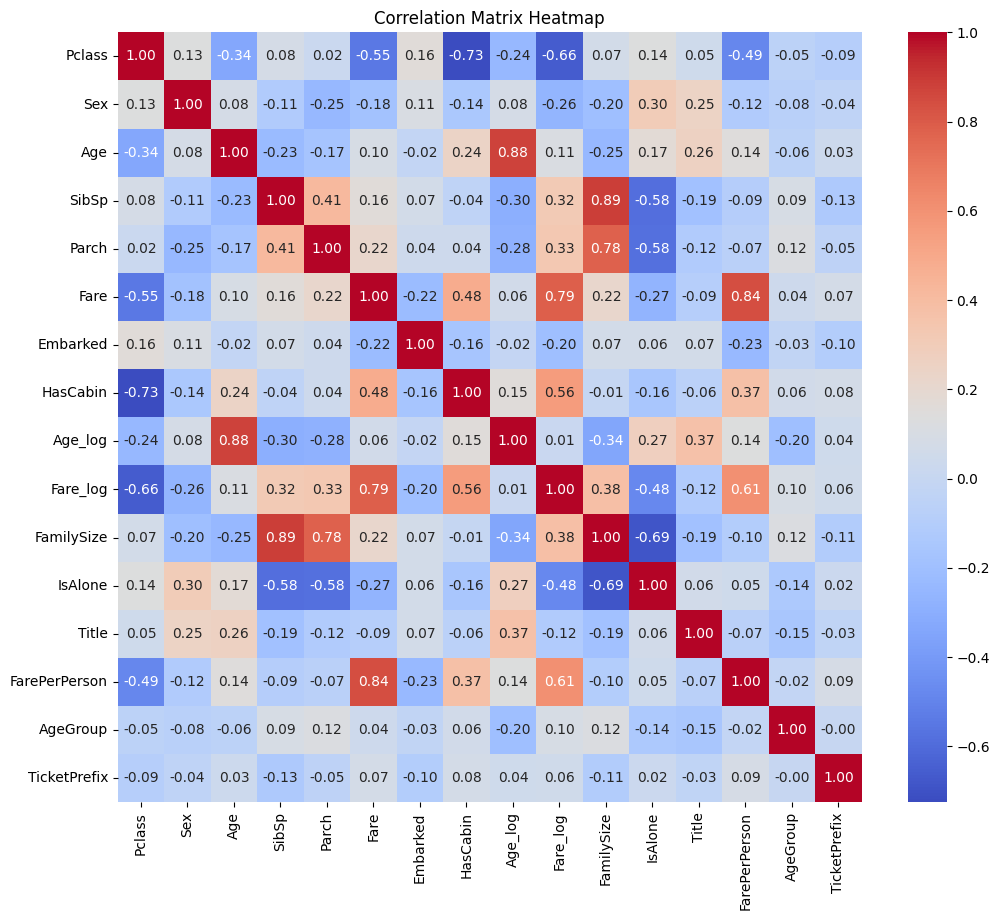

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_data_cleaned.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()